<a href="https://colab.research.google.com/github/sushree-akankshya-panda/Machine-Learning/blob/machine-learning/Copy_of_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

orignal image [[1 2 3 2 1 5]
 [4 5 6 1 2 1]
 [7 8 9 2 3 1]
 [1 0 1 2 3 1]
 [2 3 4 5 6 7]
 [1 4 3 2 1 6]]
padded image [[0 0 0 0 0 0 0 0]
 [0 1 2 3 2 1 5 0]
 [0 4 5 6 1 2 1 0]
 [0 7 8 9 2 3 1 0]
 [0 1 0 1 2 3 1 0]
 [0 2 3 4 5 6 7 0]
 [0 1 4 3 2 1 6 0]
 [0 0 0 0 0 0 0 0]]


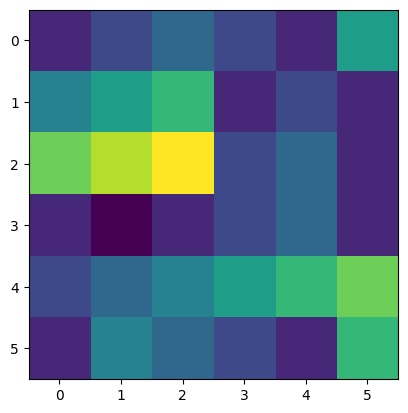

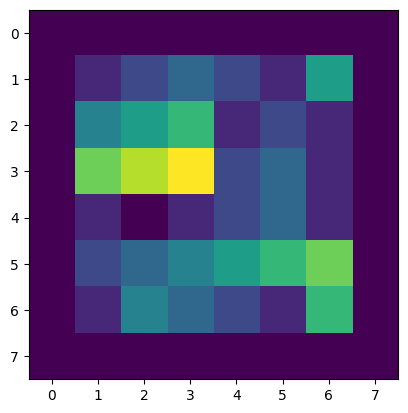

In [1]:
import numpy as np
import matplotlib.pyplot as plt
image = np.array([[1,2,3,2,1,5],
                 [4,5,6,1,2,1],
                 [7,8,9,2,3,1],
                 [1,0,1,2,3,1],
                 [2,3,4,5,6,7],
                 [1,4,3,2,1,6]])
padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=0)
print("orignal image", image)
print("padded image", padded_image)
plt.imshow(image)
plt.show()
plt.imshow(padded_image)
plt.show()

In [ ]:
y

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.9080 - loss: 0.3179 - val_accuracy: 0.9745 - val_loss: 0.0797
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9807 - loss: 0.0614 - val_accuracy: 0.9831 - val_loss: 0.0501
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9883 - loss: 0.0373 - val_accuracy: 0.9849 - val_loss: 0.0490
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9919 - loss: 0.0252 - val_accuracy: 0.9861 - val_loss: 0.0449
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9943 - loss: 0.0188 - val_accuracy: 0.9864 - val_loss: 0.0459
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9832 - loss: 0.0589


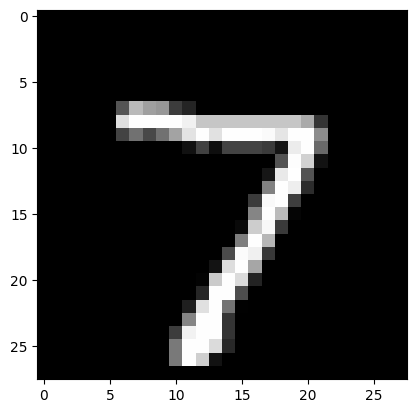

In [5]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import mnist
#import mnist dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#normalize the pixel value(0.225->0.1)
x_train, x_test= x_train/225.0, x_test/225.0

#reshape the image to (28,28,1) for CNN (1 channel for grayschale)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

#define CNN model
model = models.Sequential([
    layers.Conv2D( filters=32, kernel_size=(3,3), activation='relu',input_shape=(28,28,1) ),
    layers.MaxPool2D( pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(units=64,activation='relu'),
    layers.Dense(units=10,activation='softmax'),


    ])
model.compile (optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()
model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test),batch_size=32)
test_loss, test_acc = model.evaluate(x_test,y_test)
index=0
test_image = x_test[index]
plt.imshow(test_image.reshape(28,28),cmap='gray')
plt.show()


(60000, 28, 28)
(10000, 28, 28)
